<a href="https://colab.research.google.com/github/lhccd/mini_projects/blob/main/CSS_SemanticDrift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PRE-PROCESSING

Following code snippets is a collection of functions to pre-process the json data. 

@Marcel & @Sarah After getting rid of all hyperlinks, special characters and digits, etc. I used a stopwords list to also remove the stopwords from the tokens. The stopwords list can be found on github, along with a testing set for the pre-processing which is the first 1000 documents of the putin_2022 json file. 

Let me know, if you need anything else. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json

with open('/content/drive/MyDrive/Colab Notebooks/putin_jan_2010_to_jan_2014.json', 'r') as f:
  putin_data_2010_2014 = json.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/putin_feb_2022_to_jun_2022.json', 'r') as f:
  putin_data_2022_2022 = json.load(f)

In [ ]:
# custom Marcel

import json
with open('/content/drive/MyDrive/putin_jan_2010_to_jan_2014_full_crawl.json', 'r') as f:
  putin_data_2010_2014 = json.load(f)

with open('/content/drive/MyDrive/putin_feb_2022_to_jun_2022_full_crawl.json', 'r') as f:
  putin_data_2022_2022 = json.load(f)


In [4]:
# COLLECTION OF DATA PREPROCESSING FUNCTIONS
import re 

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def json_to_str(json_input):
  tweets_as_text_bag = ""
  tweets = []
  for e in json_input: 
    tweet = e["tweet_text"].lower()
    tweet = deEmojify(tweet)
    # remove all hyperlinks 
    tweet = re.sub(r"""(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)""", " ", tweet)
    # remove all special characters
    tweet = re.sub(r"""[^0-9a-zA-Z]+""", " ", tweet)
    tweet = tweet + " "
    tweets.append(tweet)
    tweets_as_text_bag = tweets_as_text_bag + tweet
  return tweets_as_text_bag

def json_to_list(json_input):
  tweets_as_text_bag = ""
  tweets = []
  for e in json_input: 
    tweet = e["tweet_text"].lower()
    tweet = deEmojify(tweet)
    # remove all hyperlinks 
    tweet = re.sub(r"""(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)""", " ", tweet)
    # remove all special characters
    tweet = re.sub(r"""[^0-9a-zA-Z]+""", " ", tweet)
    tweet = tweet + " "
    tweets.append(tweet)
    tweets_as_text_bag = tweets_as_text_bag + tweet
  return tweets

# WROTE MY OWN TOKENIZE, ALTERNATIVELY, WE CAN USE NLTK OR BYTE TOKENIZER
def tokenize(text: str):# -> list[str]:
    text = text.replace(".", " . ")
    text = text.replace(":", " : ")
    text = text.replace("‘on", " ‘ on ")
    text = text.replace(",", " , ")
    text = text.replace("(", " ( ")
    text = text.replace(")", " ) ")
    tokens = text.split("\n")
    tokens = text.split("\t")
    tokens = text.split("\v")
    tokens = text.split("\f")
    tokens = text.split("\r")
    tokens = text.split("\r\n")
    tokens = text.split("\n\n")
    tokens = text.split()
    return tokens

# WROTE MY OWN TOKENIZE, ALTERNATIVELY, WE CAN USE NLTK OR BYTE TOKENIZER
def tokenize_list(texts: list):# -> list[str]:
    for text in texts: 
        text = text.replace(".", " . ")
        text = text.replace(":", " : ")
        text = text.replace("‘on", " ‘ on ")
        text = text.replace(",", " , ")
        text = text.replace("(", " ( ")
        text = text.replace(")", " ) ")
        text = text.split("\n")
        text = text.split("\t")
        text = text.split("\v")
        text = text.split("\f")
        text = text.split("\r")
        text = text.split("\r\n")
        text = text.split("\n\n")
        text = text.split()
    return texts

# FILTERS TOKENS FOR DIGITS AND JUDICIAL PARAGRAPHS ETC.
def filter_tokens(tokens):
   for word in tokens[:]:
       if word.isupper() == True:
           tokens.remove(word)
   for i in range(0,len(tokens)):
       tokens[i] = tokens[i].lower()
   for word in tokens:
       if word == "chapter":
           tokens.remove(word)
       if word == "title":
           tokens.remove(word)
       if word == "subparagraph":
           tokens.remove(word)
       if word == "paragraph":
           tokens.remove(word)
       if word == "article":
           tokens.remove(word)
   for i in tokens[:]:
       if i[0].isdigit() == True:
           tokens.remove(i)
   tokens = [i for i in tokens if 3 <= len(i)]
   return tokens

# I USED A PUBLICLY AVAILABLE TXT FILE CALLED STOPWORDS BY TERRIER 
def load_stopwords(filename):
    stopwords = []
    try:
        file = open(filename)
        text = file.read()
        stopwords = text.split("\n")
    except:
        FileNotFoundError
        text = []
    return stopwords

# importing a stopwords txt file to remove the stopwords from the tokens (can be found on github) 
stopwords = load_stopwords("/content/drive/MyDrive/terrier_stopwords.txt")

# STOPWORDS ARE VERY COMMONLY USED WORDS WITH NO CONTENT RELATED RELEVANCE, SUCH AS (pronouns, adverbs, prepostions, etc.)
def remove_stopwords(tokens, stopwords):
    tokens = [i for i in tokens if i not in stopwords]
    return tokens

# BAG OF WORDS AS DICTIONARY WITH THEIR OCCURENCES SORTED IN DESCENDING OCCURENCE
def bag_of_words(tokens):
    word_bag = {}
    for i in tokens:
        word_bag[i] = word_bag.get(i,0) + 1
    word_bag = dict(sorted(word_bag.items(), key=lambda item: item[1], reverse=True))
    return word_bag
    
# NESTED LIST - LIST OF TWEETS ; TWEETS AS LIST OF TOKENS
def json_to_nested_list(json_input):
  tweets = []
  tweet_tokens = []
  for e in json_input: 
    tweet = e["tweet_text"].lower()
    tweet = deEmojify(tweet)
    # remove all hyperlinks 
    tweet = re.sub(r"""(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)""", " ", tweet)
    # remove all special characters
    tweet = re.sub(r"""[^0-9a-zA-Z]+""", " ", tweet)
    tweet = tweet + " "
    tweet_tokens = tokenize(tweet)
    tweet_tokens = filter_tokens(tweet_tokens)
    tweet_tokens = remove_stopwords(tweet_tokens, stopwords)
    tweets.append(tweet_tokens)
  return tweets


In [ ]:
# PREPROCESSING FUNCTION OF THE RAW JSON DATA USING ALL OF THE ABOVE

# importing a stopwords txt file to remove the stopwords from the tokens (can be found on github) 
# used it above under function definition already
# stopwords = load_stopwords("/content/drive/MyDrive/terrier_stopwords.txt")

def data_pre_processing(json_input):
  #print('********** tweets_text_bag')
  #tweets_text_bag = json_to_str(json_input)
  #print('********** tweets_tokens')
  #tweets_tokens = tokenize(tweets_text_bag)
  #print('********** tweets_tokens_filtered')
  #tweets_tokens_filtered = filter_tokens(tweets_tokens)
  #print('********** tweets_tokens_cleaned_stopwords')
  #tweets_tokens_cleaned_stopwords = remove_stopwords(tweets_tokens_filtered, stopwords)
  #print('********** tweets_tokens_word_bag')
  #tweets_tokens_word_bag = bag_of_words(tweets_tokens_cleaned_stopwords)
  #print('********** TOKENS')
  #print(tweets_tokens_cleaned_stopwords[:100])
  #print('********** WORD BAG')
  #print(tweets_tokens_word_bag)
  nested_list_tweets_in_tokens = json_to_nested_list(json_input)
  print('*********** NESTED LIST: TWEETS, TWEET_TOKENS')
  print("First 10 elements", nested_list_tweets_in_tokens[:10])
  return nested_list_tweets_in_tokens
  #return tweets_tokens_cleaned_stopwords


In [ ]:
tokens_putin_2010_2014 = data_pre_processing(putin_data_2010_2014)
print("processing done")
with open('/content/drive/MyDrive/Colab Notebooks/tokens_putin_2010_2014.txt', 'w') as f:
    for item in tokens_putin_2010_2014:
        f.write("%s\n" % item)

#import pickle
#with open('tokens_putin_2010_2014', 'wb') as fp:
#    pickle.dump(tokens_putin_2010_2014, fp)

*********** NESTED LIST: TWEETS, TWEET_TOKENS
First 10 elements [['trscoop', 'importantly', 'blunted', 'point', 'making', 'putin', 'winner', 'mainly', 'obama', 'incompetent'], ['putin', 'will', 'continue', 'fight', 'terrorists', 'complete', 'annihilation', 'syria', 'children', 'continue', 'die', 'weapons'], ['russia', 'putin', 'vows', 'new', 'year', 'speech', 'annihilate', 'terrorists', 'russia', 'president', 'vladimir', 'putin'], ['newstream', 'putin', 'vows', 'destroy', 'terrorists', 'bombings'], ['rebel', 'bill', 'america', 'rule', 'muslim', 'socialist', 'hussein', 'obama', 'putin', 'only', 'hope', 'christianity', 'kremlinrussia'], ['news', 'putin', 'vows', 'annihilate', 'terrorists', 'suicide', 'bombings'], ['heard', 'vladimir', 'putin', 'vows', 'total', 'annihilation', 'terrorists'], ['putin'], ['putin', 'vows', 'annihilate', 'terrorists', 'back', 'back', 'bombings'], ['glitch', 'delivers', 'putin', 'russia', 'twice', 'russians', 'heard', 'versions', 'president', 'vladimir', 'puti

In [ ]:
tokens_putin_2022_2022 = data_pre_processing(putin_data_2022_2022)
with open('/content/drive/MyDrive/Colab Notebooks/tokens_putin_2022_2022.txt', 'w') as f:
    for item in tokens_putin_2022_2022:
        f.write("%s\n" % item)

#import pickle
#with open('tokens_putin_2022_2022', 'wb') as fp:
#    pickle.dump(tokens_putin_2022_2022, fp)

*********** NESTED LIST: TWEETS, TWEET_TOKENS
First 10 elements [['octoberferguson', 'putin', 'power', 'trip'], ['new', 'nytimes', 'potus', 'confirms', 'will', 'long', 'range', 'rocket', 'systems', 'ukraine', 'piece', 'noteworthy', 'parts', 'clarifying', 'remarks', 'biden', 'made', 'poland', 'march', 'saying', 'putin', 'remain', 'power'], ['porksword', 'garysheffieldjr', 'still', 'sending', 'cashman', 'putin', 'can', 'find', 'winfield', 'dose', 'poison'], ['putin', 'nationalize', 'children', 'ukrainian', 'russian', 'repeat', 'soviet', 'times', 'aura', 'sovietization', 'russificztion', 'genocide', 'zelensky', 'right', 'kremlin', 'criminal', 'promised', 'eradicating', 'ukrainians', 'bombs', 'amp', 'social', 'engineering', 'genocide'], ['ryandcrypto', 'putin'], ['putin', 'puppets', 'voted', 'gun', 'reform', 'million', 'covid', 'deaths', 'despicable', 'traitors', 'gop', 'hate', 'americans', 'repmtg', 'putinsgop', 'gopleader', 'leadermcconnell', 'repboebert', 'senrickscott', 'sentedcruz', '

#Data Retrieval + Transformation

Interesting Findings:
- training corpus has a size of 3 GB, which is still small – for your model, you will get better results the more data you can get to pretrain on (https://huggingface.co/blog/how-to-train)
- We tokenize those English Tweets using “TweetTokenizer” from the NLTK toolkit (Bird et al., 2009) and use the emoji package to translate emotion icons into text strings (here, each icon isreferredtoasawordtoken).**bold text** We also normalize the Tweets by converting user mentions and web/url links into special tokens @USER and HTTPURL, respectively. We filter out retweeted Tweets and the ones shorter than 10 or longer than 64 word tokens. This pre-process results in the first corpus of 845M English Tweets. (http://aclanthology.lst.uni-saarland.de/2020.emnlp-demos.2.pdf)


#Train Language Model

Test Language Model

In addition to the answer by @lewtun I would not recommend to get context-less embeddings this way. The whole point of context-sensitive models is that the representation depends on the context. The meaning of “floral” (and any word, basically) depends on its context. If you use these LMs in this way, I fear your output representation may not be as stable/good as you’d want.

If you are indeed looking for single word representations without context, it might be better to rely on context-free representations as per word2vec/GloVe embeddings.

https://medium.com/analytics-vidhya/word-vectorization-using-glove-76919685ee0b

https://github.com/maciejkula/glove-python

In [ ]:
! pip install glove-python-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 5.3 MB/s 


ToDo: pre-processing of tweets: 

https://necromuralist.github.io/Neurotic-Networking/posts/nlp/01-twitter-preprocessing-with-nltk/

In [ ]:
#importing the glove library
from glove import Corpus, Glove
# define input
tweets_1 = tokens_putin_2010_2014
tweets_2 = tokens_putin_2022_2022
# creating a corpus object
corpus_1 = Corpus() 
corpus_2 = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus_1.fit(tweets_1, window=5)
corpus_2.fit(tweets_2, window=5)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
glove_1 = Glove(no_components=10, learning_rate=0.05)
glove_2 = Glove(no_components=10, learning_rate=0.05)

glove_1.fit(corpus_1.matrix, epochs=30, no_threads=4, verbose=True)
glove_2.fit(corpus_2.matrix, epochs=30, no_threads=4, verbose=True)

glove_1.add_dictionary(corpus_1.dictionary)
glove_2.add_dictionary(corpus_2.dictionary)

glove_1.save('glove_1.model')
glove_2.save('glove_2.model')

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [ ]:
glove_1.add_dictionary(corpus_1.dictionary)
glove_2.add_dictionary(corpus_2.dictionary)

In [ ]:
glove_1.dictionary

{'trscoop': 0,
 'importantly': 1,
 'blunted': 2,
 'point': 3,
 'making': 4,
 'putin': 5,
 'winner': 6,
 'mainly': 7,
 'obama': 8,
 'incompetent': 9,
 'will': 10,
 'continue': 11,
 'fight': 12,
 'terrorists': 13,
 'complete': 14,
 'annihilation': 15,
 'syria': 16,
 'children': 17,
 'die': 18,
 'weapons': 19,
 'russia': 20,
 'vows': 21,
 'new': 22,
 'year': 23,
 'speech': 24,
 'annihilate': 25,
 'president': 26,
 'vladimir': 27,
 'newstream': 28,
 'destroy': 29,
 'bombings': 30,
 'rebel': 31,
 'bill': 32,
 'america': 33,
 'rule': 34,
 'muslim': 35,
 'socialist': 36,
 'hussein': 37,
 'only': 38,
 'hope': 39,
 'christianity': 40,
 'kremlinrussia': 41,
 'news': 42,
 'suicide': 43,
 'heard': 44,
 'total': 45,
 'back': 46,
 'glitch': 47,
 'delivers': 48,
 'twice': 49,
 'russians': 50,
 'versions': 51,
 'arrive': 52,
 'pas': 53,
 'envoyer': 54,
 'messages': 55,
 'breaks': 56,
 'tradition': 57,
 'gives': 58,
 'talks': 59,
 'mauniepech': 60,
 'name': 61,
 'full': 62,
 'elimination': 63,
 'change

In [ ]:
print("LM_1 Putin Embedding: ", glove_1.word_vectors[glove_1.dictionary['putin']])
print("LM_2 Putin Embedding: ", glove_2.word_vectors[glove_2.dictionary['putin']])

LM_1 Putin Embedding:  [-0.26536354 -4.03541835  3.37612962 -1.99006843  0.68679573 -1.92978084
 -0.03657183 -2.21954341 -2.34958632 -1.12486071]
LM_2 Putin Embedding:  [-2.17217843  1.60122299  2.74832982  2.60550991  1.36411789  1.66298028
 -0.79940132 -0.57922297  2.9458425  -0.36320311]


In [ ]:
print("LM_1 Putin most similar words: ", glove_1.most_similar("putin", number = 300))
print("LM_2 Putin most similar words: ", glove_2.most_similar("putin", number = 100))

LM_1 Putin most similar words:  [('giroud', 0.9687758820296581), ('miskina', 0.9677315400197557), ('fermin', 0.9671972682184103), ('stresse', 0.9640789547228235), ('serieuse', 0.963905068623785), ('cual', 0.963526254460947), ('graaave', 0.9588077463199234), ('bute', 0.956127571061686), ('jugend', 0.9523812818276823), ('sal', 0.9517194766765863), ('mdrrrr', 0.9515127411581255), ('venis', 0.9506655181168729), ('cimer', 0.949178519023106), ('vorbild', 0.9487949373874116), ('stanbul', 0.9468773520424403), ('webos', 0.9467504456899373), ('putinfaried', 0.9464034101135607), ('hallucine', 0.9460844138195498), ('graciass', 0.9439356557245505), ('chatte', 0.943861759856361), ('dommage', 0.943849666122531), ('ss6', 0.9437804673580059), ('lettone', 0.9437441072193761), ('deaaaad', 0.9428231459432515), ('mdrrrrrr', 0.9420482367392571), ('miskine', 0.9406969803702542), ('addict', 0.9404845102844855), ('connard', 0.9404336677072913), ('mdddr', 0.9404121480548807), ('catin', 0.94032866800282), ('wsh'

In [ ]:
most_similar_1 = glove_1.most_similar("putin", number = 50000)
most_similar_2 = glove_2.most_similar("putin", number = 50000)

In [ ]:
def sim_score_1(word):
    for element in most_similar_1:
        if element[0] == word:
            return element[1]

In [ ]:
def sim_score_2(word):
    for element in most_similar_2:
        if element[0] == word:
            return element[1]

In [ ]:
word = "sanctions"
print(sim_score_1(word))
print(sim_score_2(word))


0.36035098972735574
0.5031750563467914


In [ ]:
embeds_1 = {}
for word in list(glove_1.dictionary)[:]:
  id = glove_1.dictionary[word]
  embeds_1[word] = glove_1.word_vectors[id]

embeds_2 = {}
for word in list(glove_2.dictionary)[:]:
  id = glove_2.dictionary[word]
  embeds_2[word] = glove_2.word_vectors[id]

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne_1 = TSNE(n_components=2, random_state=0)
tsne_1_voi = TSNE(n_components=2, random_state=0)
tsne_2 = TSNE(n_components=2, random_state=0)
tsne_2_voi = TSNE(n_components=2, random_state=0)

In [ ]:
words_1 =  list(embeds_1.keys())
vectors_1 = [embeds_1[word] for word in words_1]
#vectors_1_woi = [embeds_1[word] for word in words_of_interest]

words_2 =  list(embeds_2.keys())
vectors_2 = [embeds_2[word] for word in words_2]
#vectors_2_woi = [embeds_2[word] for word in words_of_interest]


In [ ]:
# distance to war

words_of_interest = [
"putin",
"russia",
"syria",
"war",
"usa",
"genocide",
"sanctions",
"bombs",
"social",
"criminal",
"peace",
"deaths",
"zelensky",
"bombs",
"beloved",
"warmongers",
"baited",
"frustration"
]

In [ ]:
Y_1 = tsne_1.fit_transform(vectors_1[:500])
#Y_1_woi = tsne_1_voi.fit_transform(vectors_1_woi)

Y_2 = tsne_2.fit_transform(vectors_2[:500])
#Y_2_woi = tsne_2_voi.fit_transform(vectors_2_woi)



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


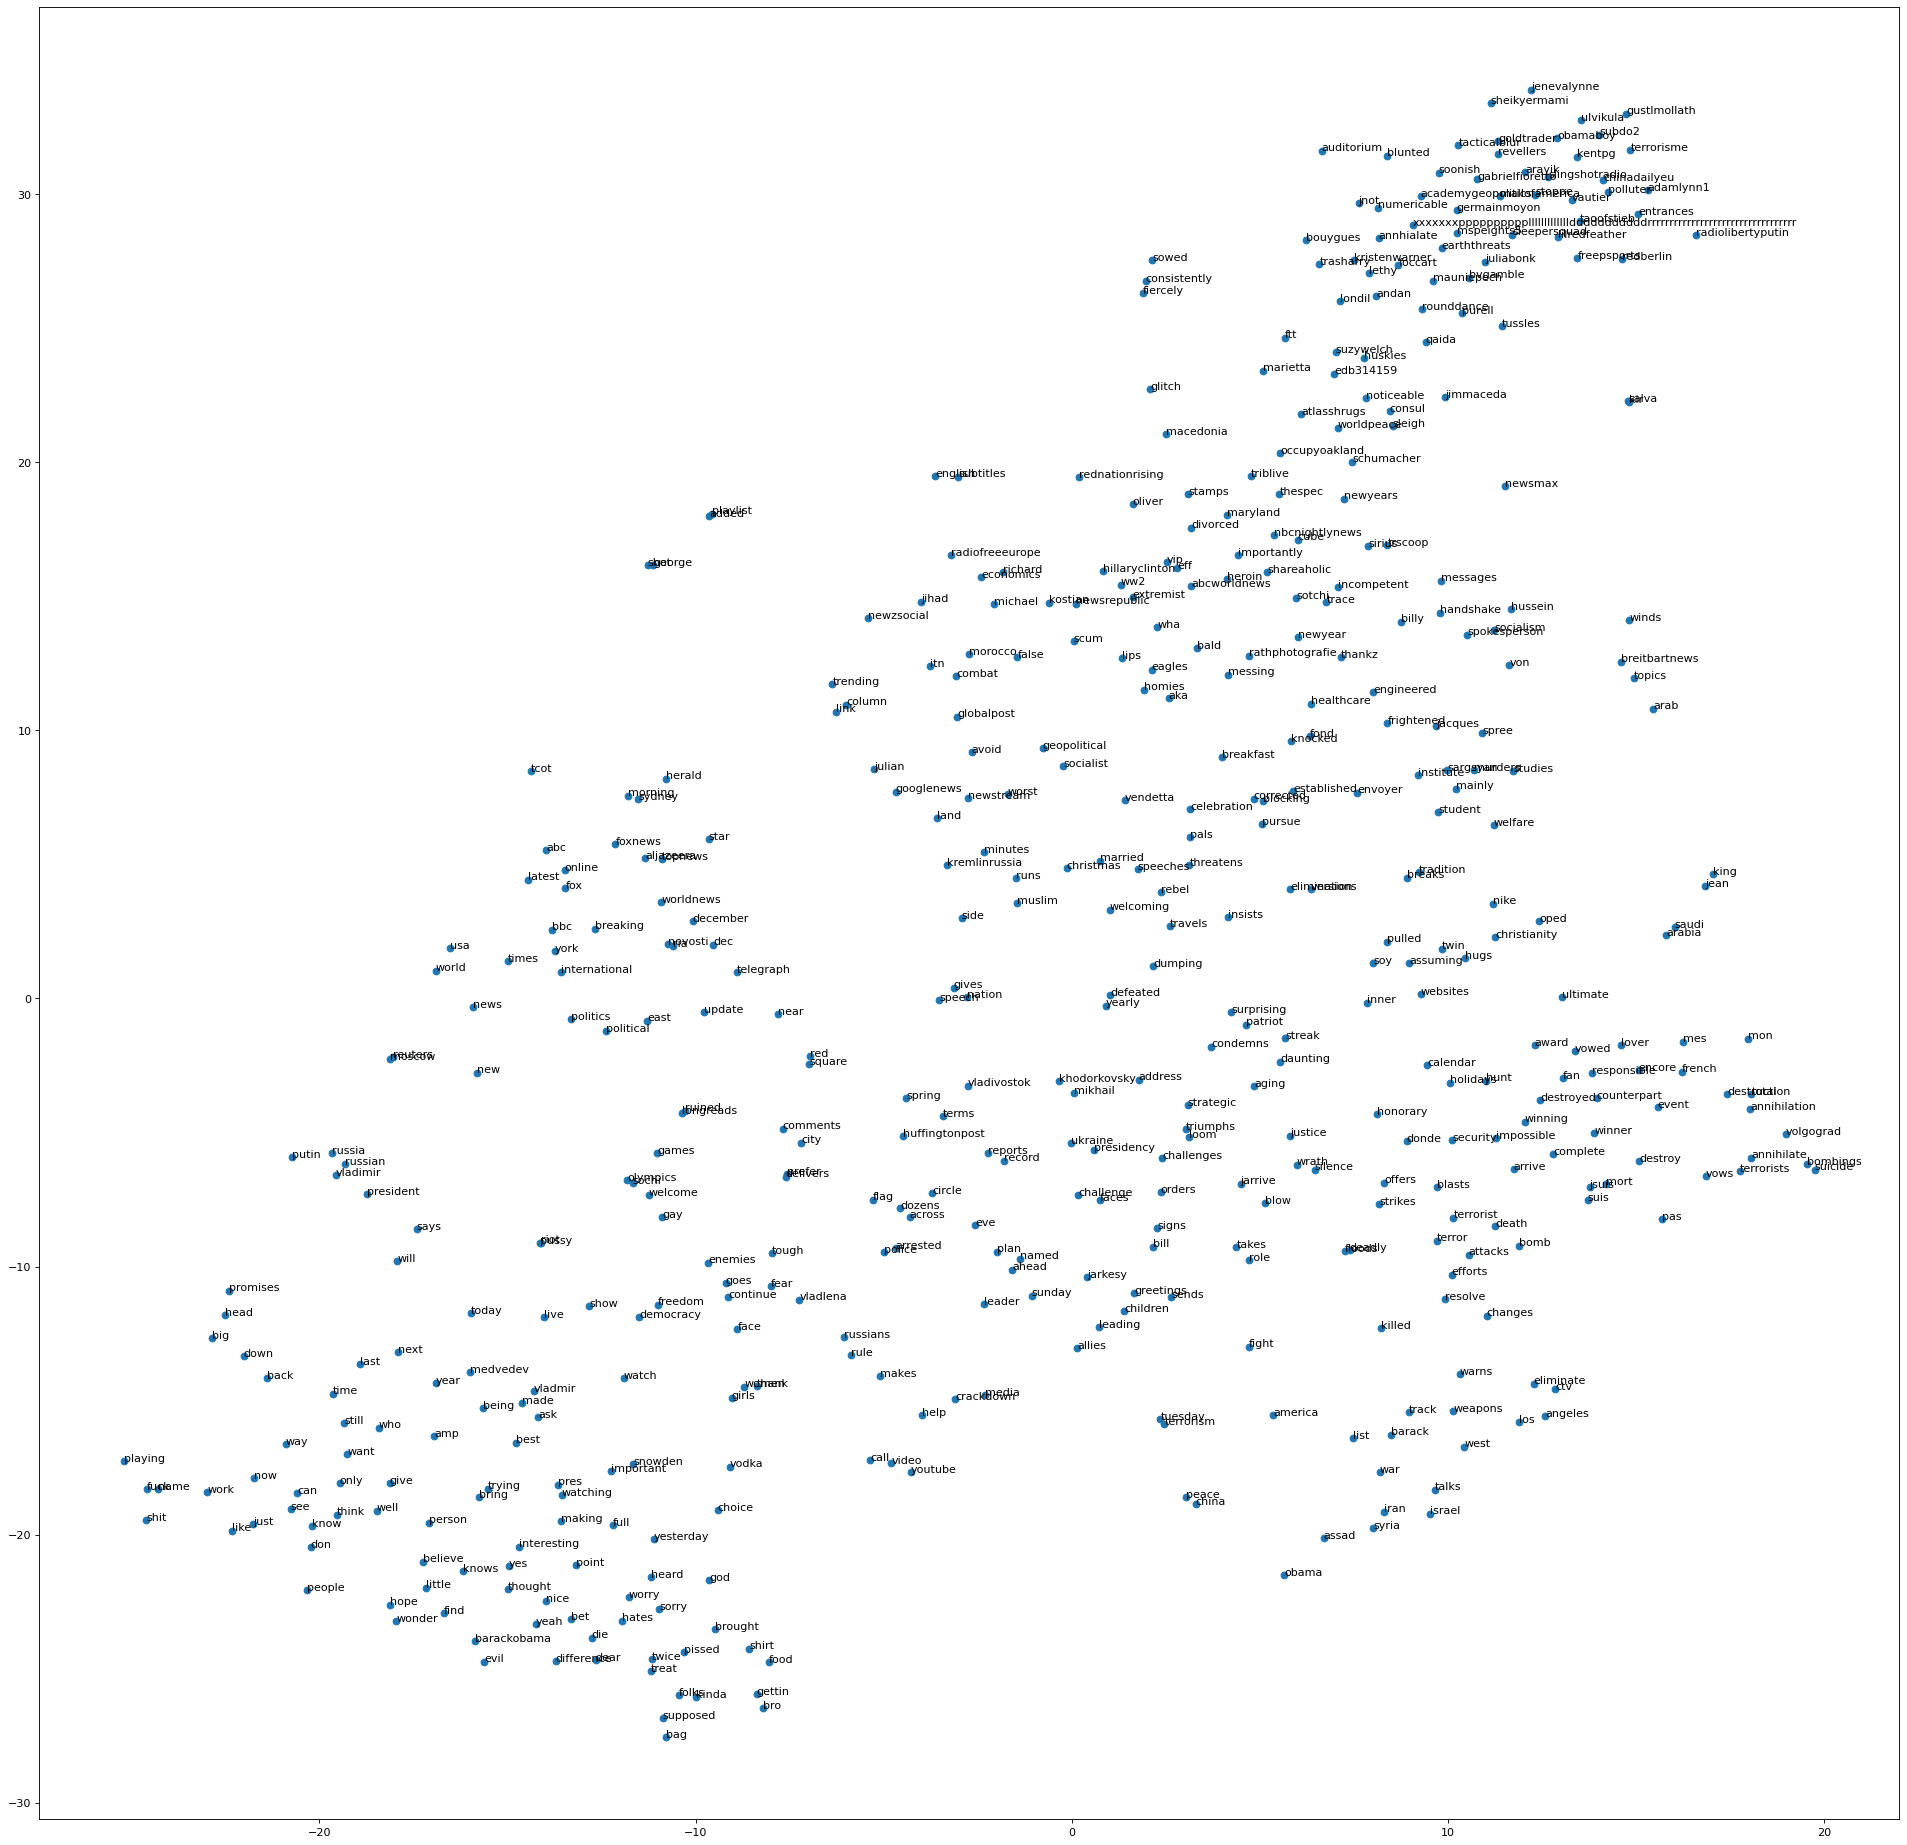

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

figure(figsize=(30, 30), dpi=80)
plt.scatter(Y_1[:, 0], Y_1[:, 1])
for label, x, y in zip(words_1, Y_1[:, 0], Y_1[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

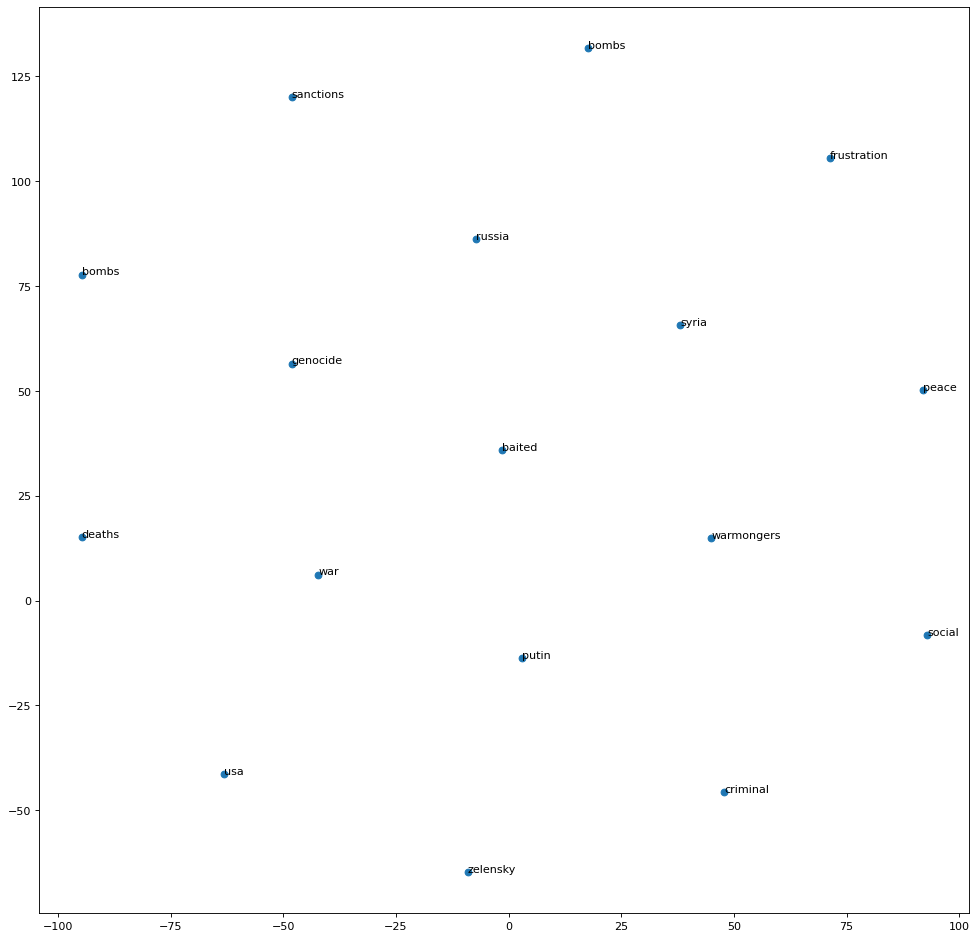

In [ ]:
figure(figsize=(15, 15), dpi=80)
plt.scatter(Y_1_woi[:, 0], Y_1_woi[:, 1])
for label, x, y in zip(words_of_interest, Y_1_woi[:, 0], Y_1_woi[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

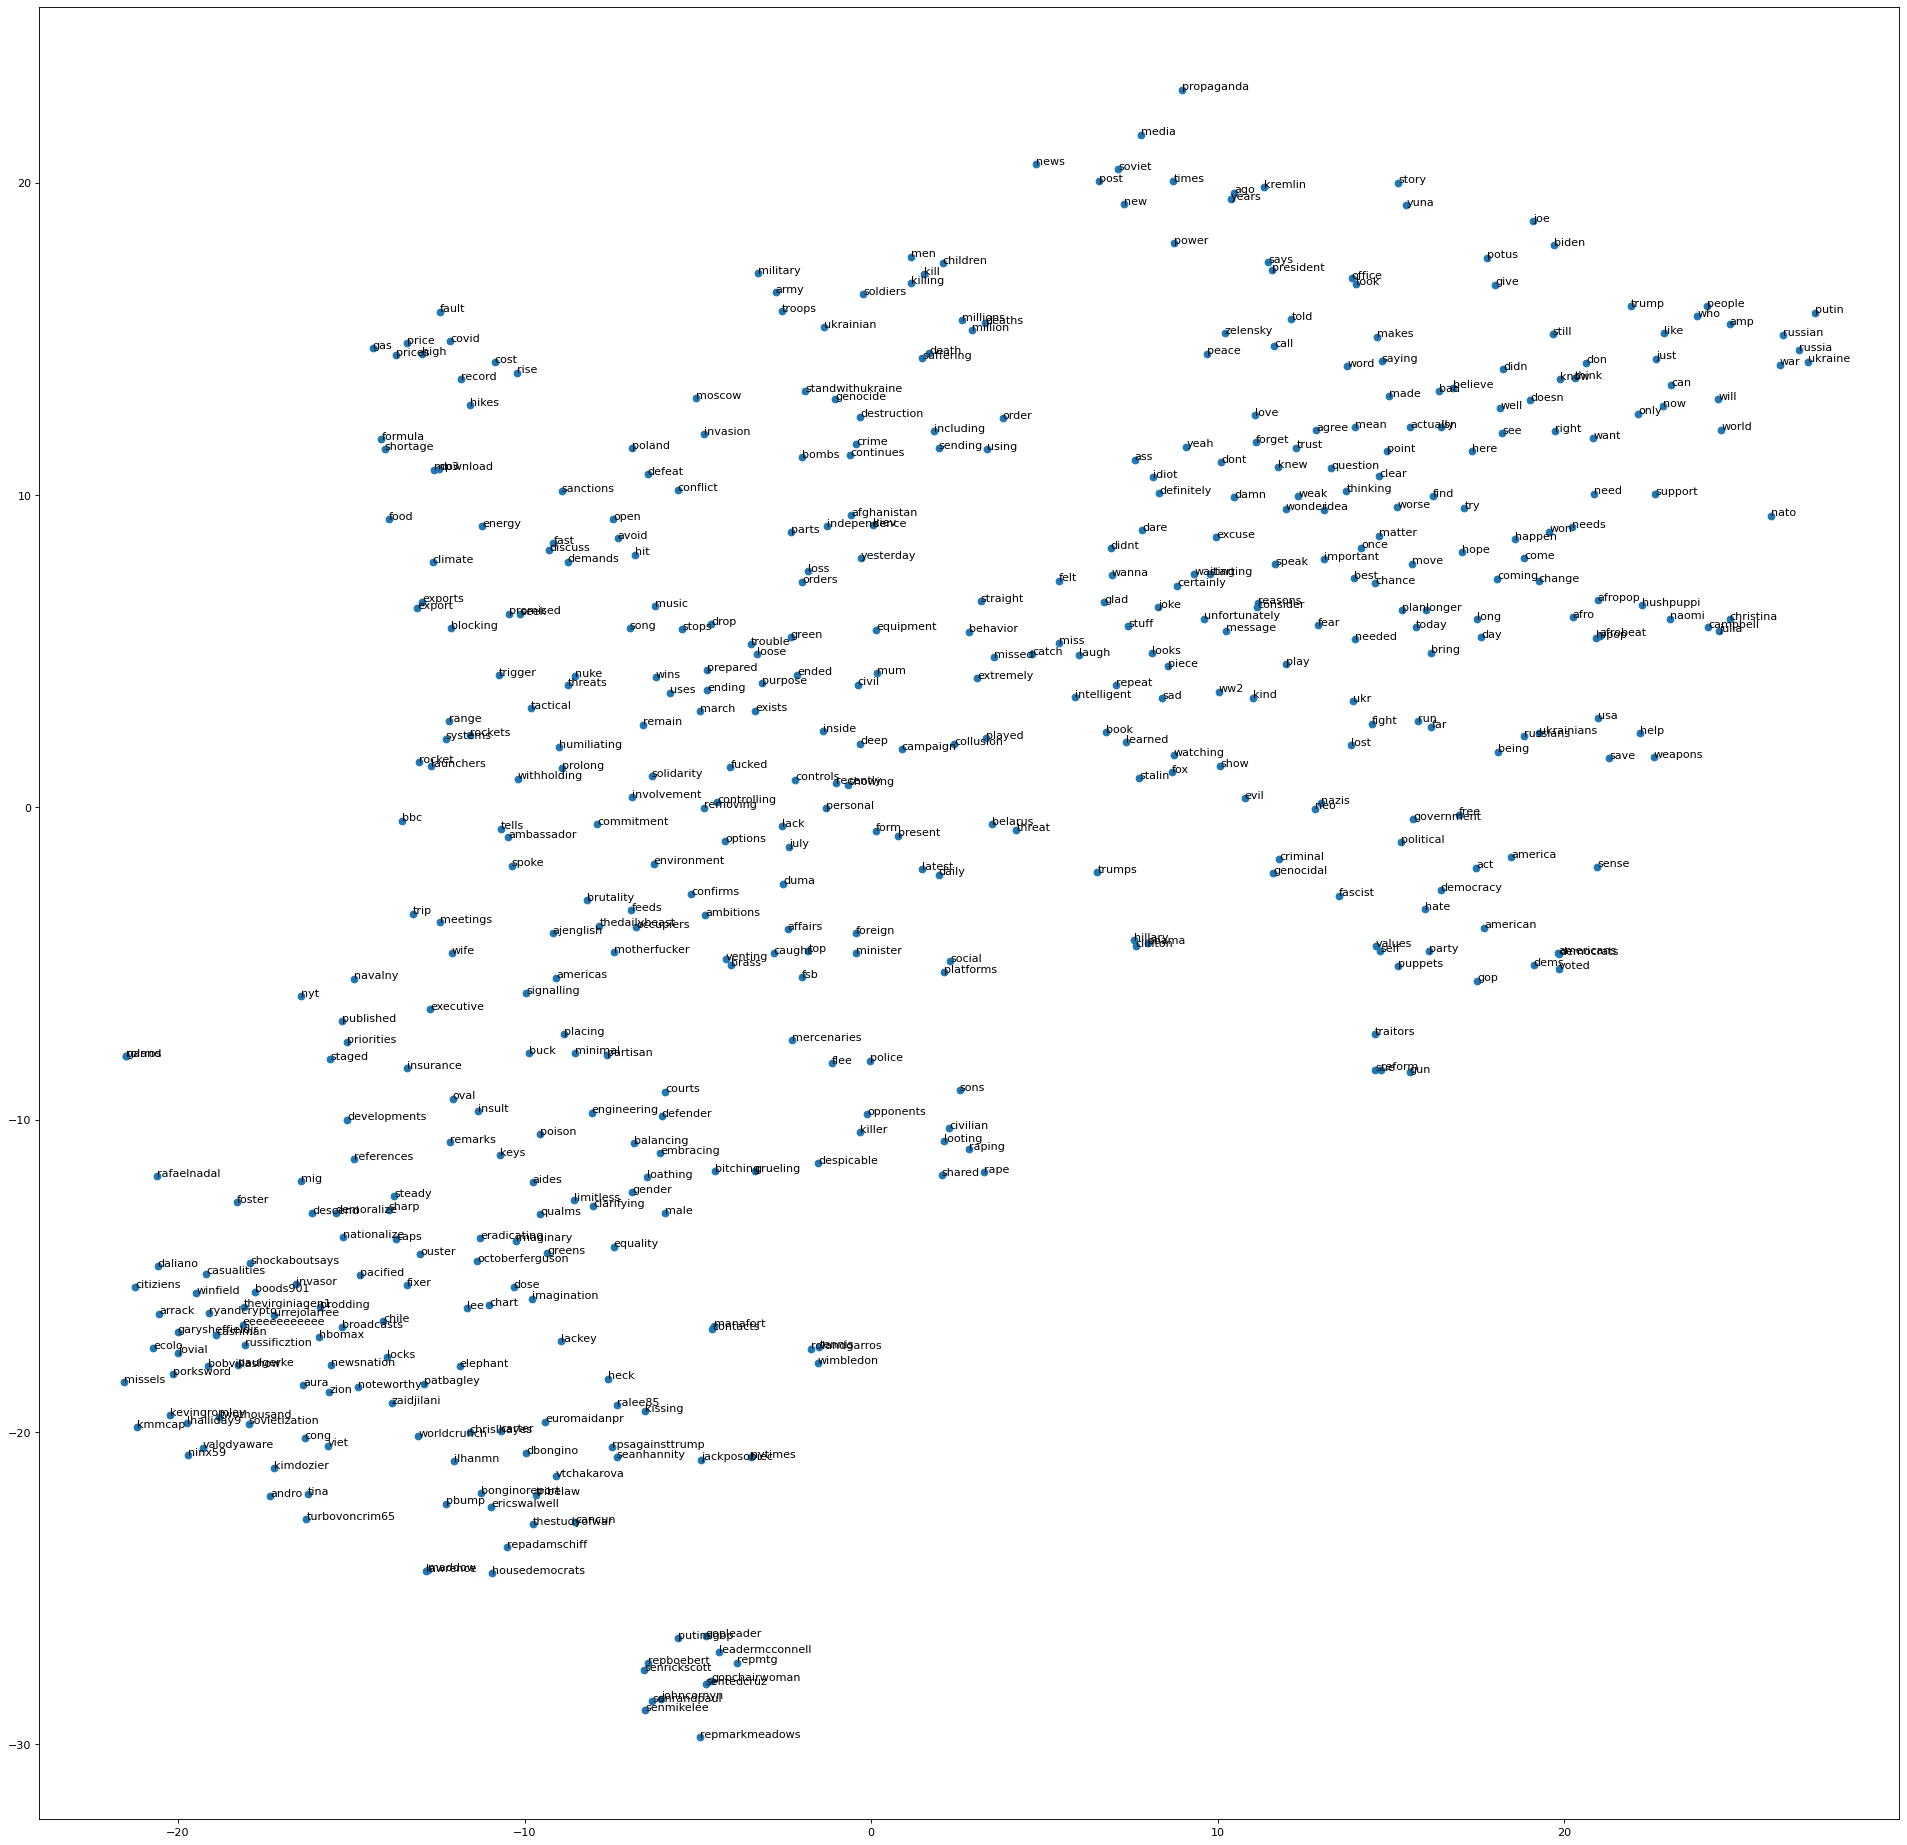

In [ ]:
figure(figsize=(30, 30), dpi=80)
plt.scatter(Y_2[:, 0], Y_2[:, 1])
for label, x, y in zip(words_2, Y_2[:, 0], Y_2[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

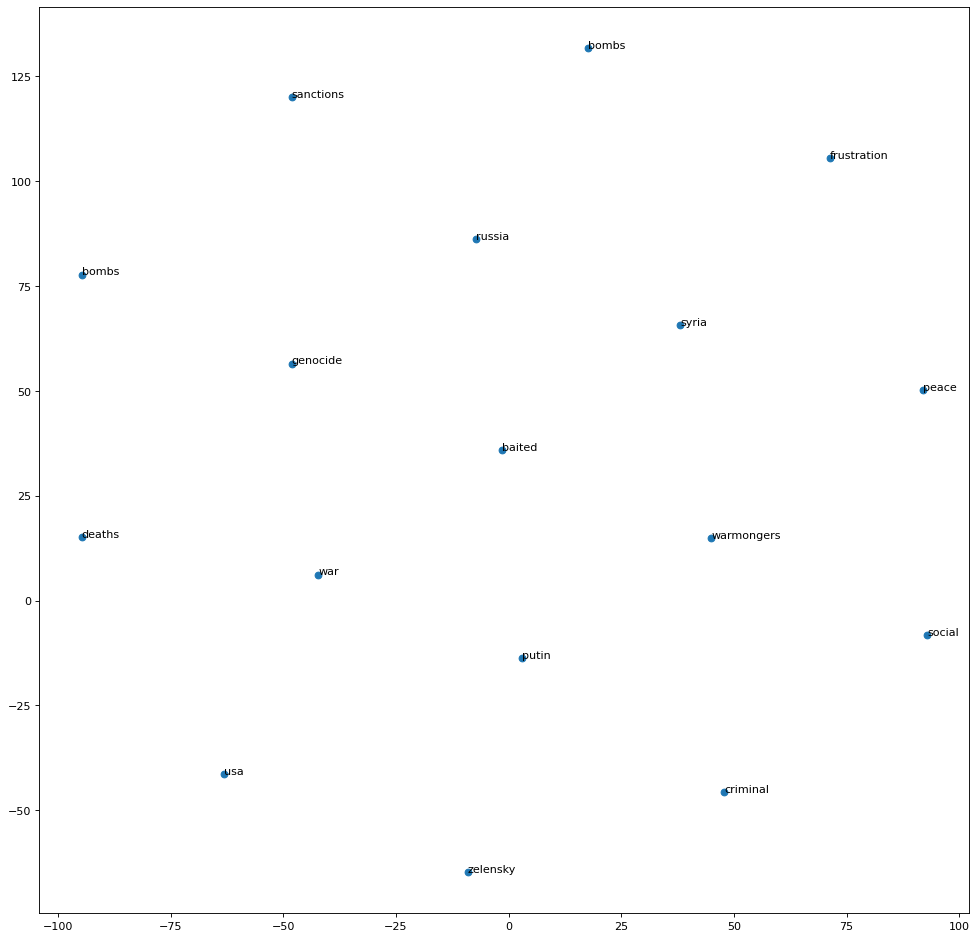

In [ ]:
figure(figsize=(15, 15), dpi=80)
plt.scatter(Y_2_woi[:, 0], Y_2_woi[:, 1])
for label, x, y in zip(words_of_interest, Y_2_woi[:, 0], Y_2_woi[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [ ]:
# nearest ones
glove_1.dictionary

In [ ]:
('beloved', 0.9408174543808585) ('warmongers', 0.9366370718753444)

('baited', 0.9612497723559158) ('frustration', 0.9593992676725706)

#LORENZ ATTEMPT# 
Twitter Viz..


In [ ]:
!pip install git+https://github.com/anbarief/statistweepy.git

In [27]:
def json_to_tweet_list(json_input):
  tweets = []
  tweet_stats = []
  tweet_str = ""
  for e in json_input: 
    tweet = e["tweet_text"].lower()
    tweet = deEmojify(tweet)
    # remove all hyperlinks 
    tweet = re.sub(r"""(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)""", " ", tweet)
    # remove all special characters
    tweet = re.sub(r"""[^0-9a-zA-Z]+""", " ", tweet)
    tweet = tweet + " "
    tweet_tokens = tokenize(tweet)
    tweet_tokens = filter_tokens(tweet_tokens)
    tweet_tokens = remove_stopwords(tweet_tokens, stopwords)
    tweet_str = " ".join(tweet_tokens)
    tweets.append(tweet_str)
    stat = e["public_metrics"]["retweet_count"]
    #print(stat)
    tweet_stats.append(stat)
  return tweets, tweet_stats

In [17]:
with open('/content/drive/MyDrive/Colab Notebooks/putin_feb_2022_to_jun_2022_limit_1000.json', 'r') as f:
  putin_2022_test = json.load(f)


In [29]:
t1, t1_stat = json_to_tweet_list(putin_2022_test)

In [47]:
import random 
tweet_list_2022, tweet_list_2022_stat = json_to_tweet_list(putin_data_2022_2022)
tweet_list_2010, tweet_list_2010_stat = json_to_tweet_list(putin_data_2010_2014)
tweet_list_2022= random.choices(tweet_list_2022, k=2000)
tweet_list_2010= random.choices(tweet_list_2010, k=2000)

In [36]:
print(tweet_list_2022[:10])
print(tweet_list_2022_stat[:10])

['chicagotribune ask putin close all gas and oil valves the and otan members soon', 'gilbertfontana gilbert there why canada not your list been very empathetic towards ukrainians standing with its leader president zelensky its people vocal against putin illegal war brought fleeing ukrainian nationals back canada providing assistance', 'integritycompa1 qasimrashid thats the easiest work destroy america from inside and putin laugh', 'marinsanna looks like are back putin may with what weapons can send dmitry medvedev the deputy chairman russia security council wrote because potus knew russia would launch retaliatory attack the', 'this pace senseless self destruction putin doesn even have plan invade the invasion already happening and its homegrown', 'davis malcolm the reason have guns are protect our democracy americans have cherished their rights self defense since the country was founded what putin like character ended the white house amp refused leave unarmed civilians can anything loo

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


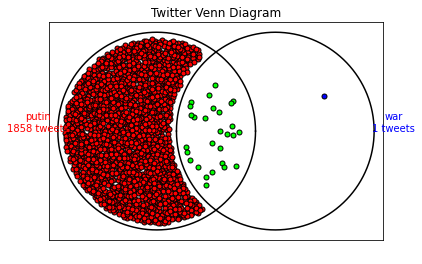

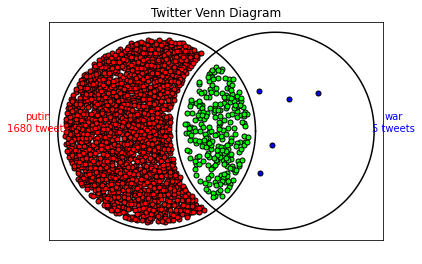

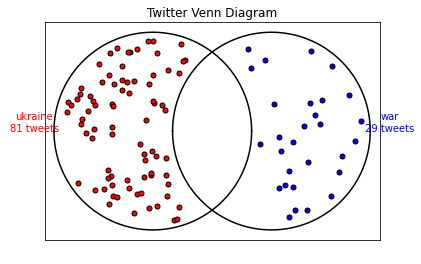

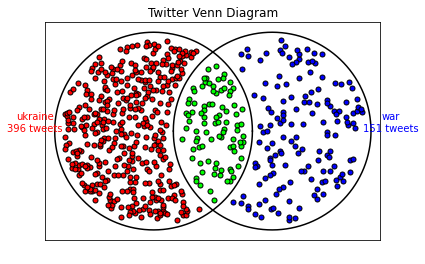

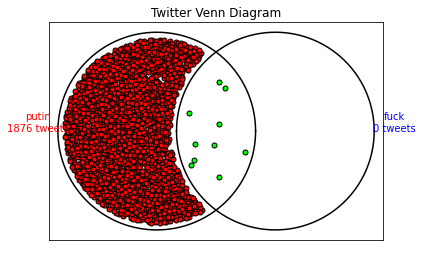

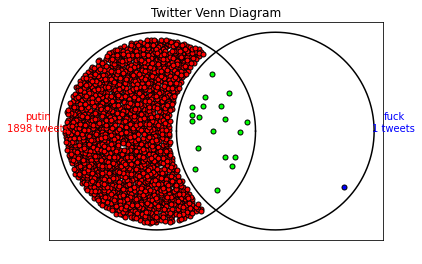

In [51]:
import nltk
nltk.download('punkt')
import random
import numpy
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from textblob import TextBlob
from statistweepy import models

sqrt = numpy.sqrt
leftcolor = [1, 0, 0, 1]
middlecolor = [0, 1, 0, 1]
rightcolor = [0, 0, 1, 1]

def distance(point1, point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
    
def in_circle(point, center, radius):
    if distance(point, center) < radius-0.7:
        return True
    else:
        return False
    
def out_circle(point, center, radius):
    if distance(point, center) > radius+0.7:
        return True
    else:
        return False
    
msize = 5
def collide(rand, points):
    r = 0.1
    for i in points:
        if distance([rand[0], rand[1]], [i[0][0], i[0][1]])<2*r:
            return True
    return False

def set_point(data, center1, radius1, center2, radius2):
    points = []
    index = 0
    for i in data:
        if i[0] == 'middle':
            rand = [ random.uniform(center1[0], center2[0]), random.uniform(center1[1]-radius1, center2[1]+radius2) ]
            while (not ( in_circle(rand, center1, radius1) and in_circle(rand, center2, radius2) )) or collide(rand, points):
                rand = [ random.uniform(center1[0], center2[0]), random.uniform(center1[1]-radius1, center2[1]+radius2) ]
            points.append((rand, index))
        if i[0] == 'left':
            rand = [ random.uniform(center1[0]-radius1, center1[0]+radius1), random.uniform(center1[1]-radius1, center1[1]+radius1) ]
            while (not ( in_circle(rand, center1, radius1) and out_circle(rand, center2, radius2) ) ) or collide(rand, points):
                rand = [ random.uniform(center1[0]-radius1, center1[0]+radius1), random.uniform(center1[1]-radius1, center1[1]+radius1) ]
            points.append((rand,index))
        if i[0] == 'right':
            rand = [ random.uniform(center2[0]-radius2, center2[0]+radius2), random.uniform(center2[1]-radius2, center2[1]+radius2) ]
            while (not ( in_circle(rand, center2, radius2) and out_circle(rand, center1, radius1) ) ) or collide(rand, points):
                rand = [ random.uniform(center2[0]-radius2, center2[0]+radius2), random.uniform(center2[1]-radius2, center2[1]+radius2) ]
            points.append((rand, index))
        index += 1
    return points

def plot_ven(tweet_list, tweet_list_stat, term1, term2):
  highlight1 = (term1,)
  highlight2 = (term2,)
  #dataset = models.Tweets(tweets_np)
  tweets_dic = {}
  #tweets_dic['tweet'] = dataset
  tweets_dic['text'] = tweet_list#[:200]
  tweets_dic['word'] = [TextBlob(i).words for i in tweets_dic['text']]
  tweets_dic['stats'] = tweet_list_stat
  tweets_dic['category'] = []
  for i in tweets_dic['word']:
      lower = [j.lower() for j in i]
      count = 0
      result = (False, )
      for k in highlight1:
          if k in lower:
              result = ('left', leftcolor)
              count += 1
              break
      for k in highlight2:
          if k in lower:
              result = ('right', rightcolor)
              count += 1
              break
      if count == 2:
          result = ('middle', middlecolor)
      tweets_dic['category'].append(result)
  radius1 = 10
  shift1 = -6
  center1 = (shift1, 0)
  x1 = [(-radius1+shift1)+i*0.001 for i in range(2*1000*radius1 + 1)]
  y1_upper = [sqrt(radius1**2 - (i-shift1)**2) for i in x1]
  y1_lower = [-y for y in y1_upper]

  radius2 = 10
  shift2 = 6
  center2 = (shift2, 0)
  x2 = [(-radius2+shift2)+i*0.001 for i in range(2*1000*radius2 + 1)]
  y2_upper = [sqrt(radius2**2 - (i-shift2)**2) for i in x2]
  y2_lower = [-y for y in y2_upper]
  fig,ax = plt.subplots()
  ax.plot(x1, y1_upper, color = 'k')
  ax.plot(x1, y1_lower, color = 'k')
  ax.plot(x2, y2_upper, color = 'k')
  ax.plot(x2, y2_lower, color = 'k')
  ax.set_facecolor('white')
  points = set_point(tweets_dic['category'], center1, radius1, center2, radius2)
  
  ns = {'left':0, 'middle':0, 'right':0}
  for i in points:
      index = i[1]
      col = tweets_dic['category'][index][1]
      cat = tweets_dic['category'][index][0]
      ns[cat]+=1
      ax.plot(*i[0], marker = 'o', ms = msize, \
              #color = [col[0], col[1], col[2], 0.2 + min(0.8, tweets_dic['stats'][index][0]/maxrt)], \
              color = [col[0], col[1], col[2], 0.2 + min(0.8, 1)], \
              markeredgecolor = 'black', lw = 4)
  ax.text(shift1-radius1-2, 0, highlight1[0]+'\n'+str(ns['left'])+' tweets', ha = 'center', color = 'red')
  ax.text(shift2+radius2+2, 0, highlight2[0]+'\n'+str(ns['right'])+' tweets', ha = 'center', color = 'blue')
  ax.tick_params(colors = [0,0,0,0])
  plt.axis('equal')
  ax.set_title('Twitter Venn Diagram')
  fig.show()

plot_ven(tweet_list_2010, tweet_list_2010_stat, 'putin', 'war')
plot_ven(tweet_list_2022, tweet_list_2022_stat, 'putin', 'war')
plot_ven(tweet_list_2010, tweet_list_2010_stat, 'ukraine', 'war')
plot_ven(tweet_list_2022, tweet_list_2022_stat, 'ukraine', 'war')
plot_ven(tweet_list_2010, tweet_list_2010_stat, 'putin', 'fuck')
plot_ven(tweet_list_2022, tweet_list_2022_stat, 'putin', 'fuck')